An upcoming financial institution wants to specialize in student loans and has contacted us in September of 2013 to look at their data.<br/>
You are given three datasets:
* college_features_2012_2013/2013_2014: contains general information about US colleges
* loans_2012_2013: contains the amount and type of loans given to students studying at US colleges
* default_rates_2012_2013/2011_2012: contains default rates of student loans studying at US colleges

### Q1: If given the chance, what would you try to predict, given this dataset? How would you try to achieve this? (you can suggest multiple possibilities, ranked by importance)

Our client is an upcoming financial institution. For now we assume the institution already specializes in other types of loans and wants to specialize in student loans in addition . The overall goal is to determine their exposure to risk. Default rates are an important statistical measure for this. Default rates are often used by lenders to determine their exposure to risk.

The datasets we have are from the federal government and consists of loans that come directly from the government. The financial institution is a private organisation. Our client is only interested in unsubsidized undergraduate loans. Unsubsidized loans are not based on financial need and the interest starts to accrue when the student is studying. The interest rates on federal loans are fixed. On the contrary, the interest rates on private student loans can be variable or fixed and are usually higher. We can assume that interest rates are only affected by the expected default rates.

We seek to address the business problem by building a model that can estimate the relationship between a potential institution a student would attend and the total default rate for that institution. A scalable model can help identify features across institutuons that contribute to higher federal default rate. This offers great insights for our client. Knowing that certain features are an important factor in choosing whether or not to grant loans.

#### What to predict? 
- Analyze what features present among institutions are most likely to give an accurate prediction of student default rates on federal student loans. I would perform data analysis to reduce the feature space. The datasets given contain a large number of features, and can cause poor performance for predictive modeling techniques. The reduced features are a great resource for the client to get insight on what influences the rates. 

- Build a model that predicts default rates of the coming year. Multiple regression models can be used to achieve this. The best model can be retrained on new data and re-used for future decision making. The results of this research are used by the client to determine the interest rates. They can create loans that offer competitive rates. 

- If we look at the data there is a clear lack of student-centric level data, data on individual students at the universities and their respective demographic, financial and other qualities: such as for example other student loans taken, other lines of credit, and more. I would try to determine which features are also important to incoorporate in the datasets and seek for datasets containing this information.

### Q2: Why is this relevant to the company's bottom line? Explain the impact of an accurate prediction on the company's workflow and rudimentarily formulate its influence on company profits mathematically. 

Proper research beforehand is very important for decision-making. We will find some causal relationships for what
institutional factors may attract or potentially influence students at the aggregate level to default. Using these relationships, we can predict accurate default rates, which can then be used by the company to set the interest rates accordingly. 

In addition, our research can help the institution to draw up up a checklist (per university/client or general) to see what information they need from a potential new customer to determine the risk and the interest rate. 

All of this can help the company to reduce risk and increase profits.  

### Q3: Find and display graphically as many relevant insights as possible. What is contained in your graphs and why are your conclusions important? 

#### Data Description

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

#LOAD DATA
#Features
college_features_description = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/college_features_description.csv") 
college_features_2012_2013 = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/college_features_2012_2013.csv")
college_features_2013_2014 = pd.read_csv("/Users/dilan/task/Datasets/Current Data/college_features_2013_2014.csv")
#Default Rates
default_rates_2011_2012 = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/default_rates_2011_2012.csv")
default_rates_2012_2013 = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/default_rates_2012_2013.csv")
#Loans
loans_description = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/loans_description.csv")
loans_2012_2013   = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/loans_2012_2013.csv")

Each dataset contains an OPEID field, Office of Postsecondary Education ID, used by the Department of Education for federal student financial aid eligibility purposes. The OPEID is a unique identifier, which we will use as an unique link between the datasets. To develop the feature space more fully, we will use the OPEID to merge the datasets.

We will examine different aspects of the dataset and identify possible places of interest to explore in further detail.

Join datasets using the OPEID key. Add the default rates from the previous academic year to the dataset. I expect that the default rates of the previous academic year will have a strong positive correlation with the default rates of the following academic year.

- Add "2011-2012 default data" as a feature to "college features data 2012-2013" and set the default data from 2012-2013 as the target/label to "college features data 2012-2013".

- Add "2012-2013 default data" as a feature to "college features data 2013-2014" --> Goal: Predict the default rates for 2013-2014. 

Remove child organizations in the college features datasets from 2012-1013 and 2013-2014 before merging. We only keep the parent organizations in the data, as we only have information about the default rate of the parent organizations thus this will result in more accurate predictions.  

In the default rates data we remove: name, city, state, zip (duplicates)

In [2]:
# Remove child organizations 
college_features_2012_2013 = college_features_2012_2013.drop_duplicates(subset='opeid', keep='first')
college_features_2013_2014 = college_features_2013_2014.drop_duplicates(subset='opeid', keep='first')

# Remove columns (already present in college features) from default rates data
default_rates_2011_2012 = default_rates_2011_2012.drop(columns=['name', 'address', 'city','state','zip'])
default_rates_2012_2013 = default_rates_2012_2013.drop(columns=['name','address', 'city','state','zip'])

In [3]:
# Add previous default_rates_2011_2012 as a feature to college_features_2012_2013
# Add previous default_rates_2012_2013 as a feature to college_features_2013_2014
college_features_2012_2013 = college_features_2012_2013.merge(default_rates_2011_2012, on=['opeid'])
college_features_2013_2014 = college_features_2013_2014.merge(default_rates_2012_2013, on=['opeid'])

In [4]:
# Add default rate per college from 2012_2013 as target values: 
# Merge on opeid
target = default_rates_2012_2013.drop(columns=['number_of_defaults', 'number_of_loans'])
target.rename(columns={'default_rate':'target'}, inplace=True)
college_features_2012_2013 = college_features_2012_2013.merge(target, on=['opeid'])

Missing values in this dataset are not clearly obvious. This will be a potential caveat during the analysis. We can see NaN values across different features. The presence of these values hinders the predictive ability of our features. 

- There seem to be a lot of NaN values for certain features. The features with excessive number of NaN values are displayed in the graphs below for both colege features datasets 2012-2013 and 2013-2014. We can suspect that the information missing could be purposely not given by the universities to make the college more attractive to students. This also means that these features affect the default rate. The data missing may not be at random. 
- Other features related to ethnicity and program percentages do not have a high number of missing values.
- Factual features (adress, zip code, institution name) do not contain any NaN values. 


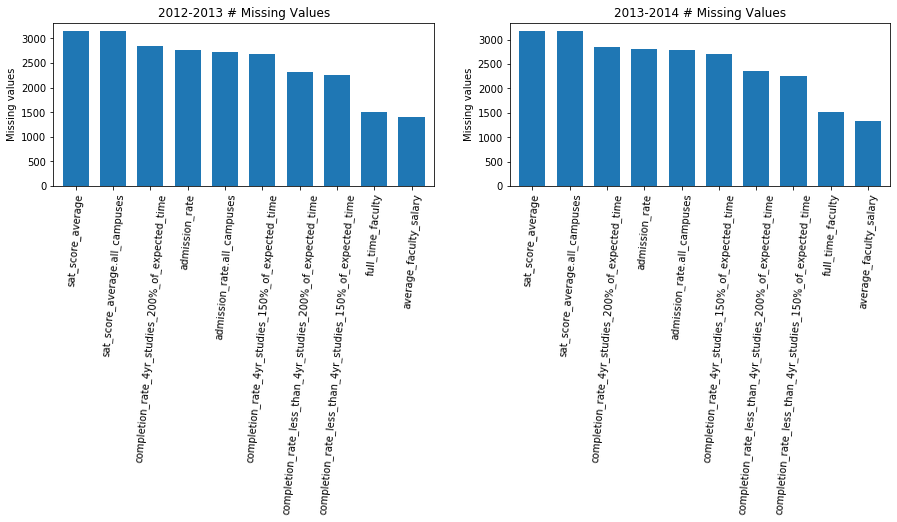

In [5]:
pd.options.display.max_rows = 999
f = plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1).title.set_text('2012-2013 # Missing Values')
missingValues_2012_2013 = college_features_2012_2013.isnull().sum().sort_values(ascending=False).head(10)
ax1 = missingValues_2012_2013.plot.bar(rot=85, width=0.7, align='center').set_ylabel('Missing values')
plt.subplot(1, 2, 2).title.set_text('2013-2014 # Missing Values')
missingValues_2013_2014 = college_features_2013_2014.isnull().sum().sort_values(ascending=False).head(10)
ax2 = missingValues_2013_2014.plot.bar(rot=85, width=0.7, align='center').set_ylabel('Missing values')

#### Univariate Explorations

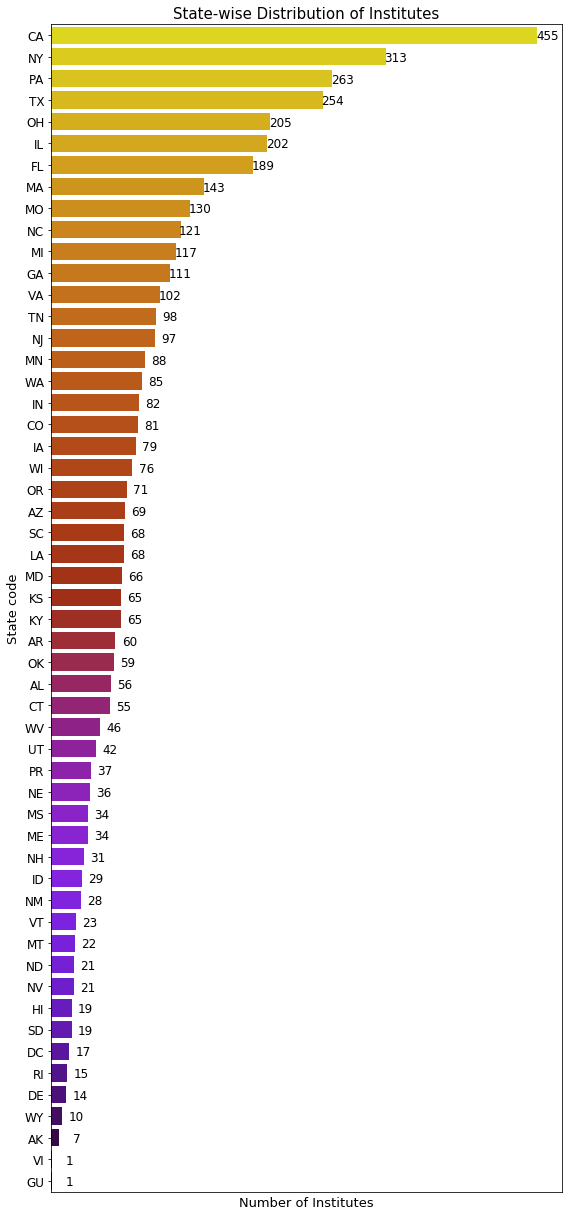

In [6]:
plt.figure(figsize = (8, 17))

df = college_features_2012_2013  
number = df.state.value_counts().values

# plot
ax = sns.barplot(df.state.value_counts().values, list(df.state.value_counts().index), 
           palette = sns.color_palette('gnuplot_r', len(df.state.value_counts())))

# annotate the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='right', va='center', fontsize = 12)

# label the plot
plt.title('State-wise Distribution of Institutes', fontsize = 15)
plt.xlabel('Number of Institutes', fontsize = 13)
plt.ylabel('State code', fontsize = 13)
plt.xticks([], [])
plt.yticks(fontsize = 12)

plt.tight_layout();

- The states of California (CA), New York (NY), Texas (TX), Florida (FL), Pennsylvania (PA), Ohio (OH) and Illinois (IL) have the heighest number of institutes. 

##### Which type of governance structure is the most common in the US across institutes?

In [7]:
df.control.replace(to_replace = {1: 'public', 2: 'private non-profit', 
                                                         3: 'private for-profit'}, inplace = True)

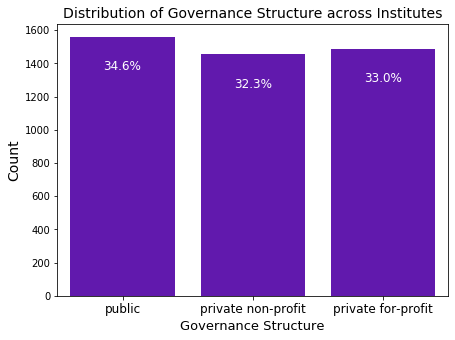

In [8]:
# plot
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'control', color = sns.color_palette('gnuplot_r')[5])

# annotate
n_points = df.shape[0]
cat_counts = df.control.value_counts()
locs, labels = plt.xticks()                # get current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_points)
    
    # print the annotations below the top of the bar
    plt.text(loc, count-200, pct_string, ha = 'center', color = 'w', fontsize = 12)
    
# label
plt.title('Distribution of Governance Structure across Institutes', fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel("Governance Structure", fontsize = 13)
plt.ylabel('Count', fontsize = 14);

- Public Schools are the most common in the US. The difference is not large. The number of public, private non-profit and private for-profit institutes in the US is approximately the same.

##### How much do Institutions in the US make per student as tuition fee?

In [9]:
df.net_tuition_revenue_per_full_time_equivalent_student.describe()

count      4499.000000
mean       9448.184041
std        7959.016093
min           0.000000
25%        3788.500000
50%        7931.000000
75%       12950.500000
max      138627.000000
Name: net_tuition_revenue_per_full_time_equivalent_student, dtype: float64

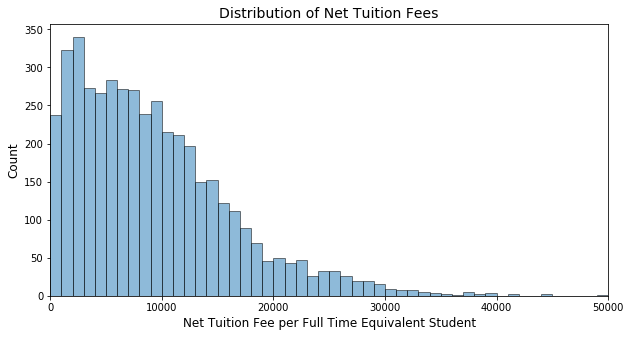

In [10]:
plt.figure(figsize = (10,5))

# specify the bins
bins = np.arange(0, df.net_tuition_revenue_per_full_time_equivalent_student.max() + 1000, 1000)

# plot
plt.hist(data = df, x = 'net_tuition_revenue_per_full_time_equivalent_student', 
         bins = bins, alpha=0.5, histtype='bar', ec='black');
plt.xlim(0,50000)

# label
plt.title('Distribution of Net Tuition Fees', fontsize = 14)
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [11]:
less_than_median = df.query('net_tuition_revenue_per_full_time_equivalent_student < 9448').groupby('control').size().reset_index(name = 'count: fee less than median')
more_than_median = df.query('net_tuition_revenue_per_full_time_equivalent_student > 9448').groupby('control').size().reset_index(name = 'count: fee more than median')

less_than_median.merge(more_than_median)

,control,count: fee less than median,count: fee more than median
0,private for-profit,855,632
1,private non-profit,335,1118
2,public,1437,122


We can see that institutes that earn more than the median per student are predominately private schools. 


Since the distribution is skewed to the right, lets look at the more expensive institutes:

In [12]:
df.query('net_tuition_revenue_per_full_time_equivalent_student > 60000')[['name','state', 'control', 'net_tuition_revenue_per_full_time_equivalent_student', 'target']].sort_values(by = 'net_tuition_revenue_per_full_time_equivalent_student')

,name,state,control,net_tuition_revenue_per_full_time_equivalent_student,target
3526,Interactive College of Technology,TX,private for-profit,60134.0,7.0
4084,Aviator College of Aeronautical Science and Te...,FL,private for-profit,61052.0,9.5
2013,The International Culinary Center,NY,private for-profit,64579.0,7.5
4261,Aveda Institute-Chicago,IL,private for-profit,66529.0,11.8
2610,Pennsylvania State University-Dickinson Law,PA,public,70101.0,4.9
2875,Daymar College-Nashville,TN,private for-profit,103184.0,25.6
3811,Aerosim Flight Academy,FL,private for-profit,110208.0,12.5
3133,SIT Graduate Institute,VT,private non-profit,121529.0,4.3
4454,Paul Mitchell the School-Raleigh,NC,private for-profit,138627.0,8.4


* Most of the institutions are private and predominately private for-profit
* The bottom four institutes earn over 100,000 per FTE. These datapoints are errors in all likelyhood. A simple Google search shows that "Paul Mitchell the School-Raleigh" has a net tuition of $15.800. 

##### How is the distribution of admission rates across all institutes? 

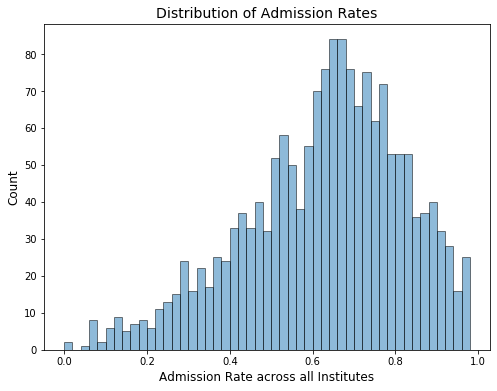

In [13]:
# specify the bins
bins = np.arange(0, 1, 0.02)

# plot
plt.figure(figsize = (8,6))
plt.hist(data = df, x = 'admission_rate.all_campuses', bins = bins, alpha=0.5, histtype='bar', ec='black')
# label
plt.title('Distribution of Admission Rates', fontsize = 14)
plt.xlabel('Admission Rate across all Institutes', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

- The distribution is left skewed, which means that schools in the US have admission rates on the higher side.

##### How is the distribution of SAT scores across all institutes? 

In [14]:
df['sat_score_average.all_campuses'].describe()

count    1357.000000
mean     1059.064112
std       131.552477
min       602.000000
25%       975.000000
50%      1043.000000
75%      1122.000000
max      1520.000000
Name: sat_score_average.all_campuses, dtype: float64

Text(0.5, 1.0, 'Distribution of Average SAT Scores')

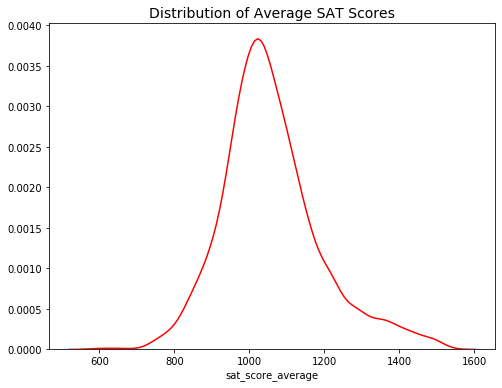

In [15]:
# Calculate correlations
plt.figure(figsize = (8,6))
sns.distplot(df['sat_score_average'],rug=False, hist=False, color="r")
plt.title('Distribution of Average SAT Scores', fontsize = 14)

In [16]:
df.query('sat_score_average > 1450')[['name', 'state', 'control', 'sat_score_average']].sort_values(by = 'sat_score_average', ascending= False)

,name,state,control,sat_score_average
179,California Institute of Technology,CA,private non-profit,1520.0
277,Harvey Mudd College,CA,private non-profit,1500.0
1385,Harvard University,MA,private non-profit,1497.0
1889,Princeton University,NJ,private non-profit,1492.0
3959,Franklin W Olin College of Engineering,MA,private non-profit,1492.0
1401,Massachusetts Institute of Technology,MA,private non-profit,1490.0
556,Yale University,CT,private non-profit,1488.0
1969,Columbia University in the City of New York,NY,private non-profit,1486.0
1748,Washington University in St Louis,MO,private non-profit,1478.0
2925,Vanderbilt University,TN,private non-profit,1471.0


- We can see from the table and the distribution that the average SAT score is 1043.
- The highest SAT scores are from predominately private non-profit institutes.

##### How is the distribution of completion rates across all institutes? 

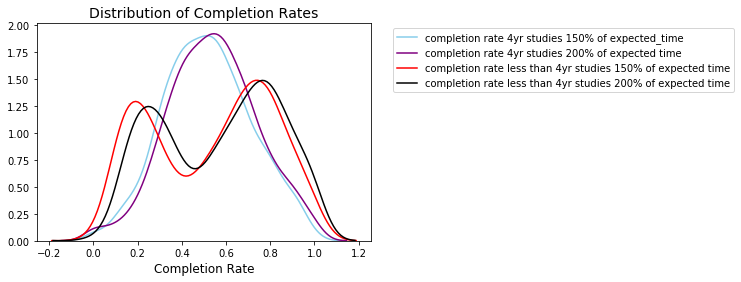

In [17]:
sns.distplot( df["completion_rate_4yr_studies_150%_of_expected_time"] , 
             color="skyblue", label="completion rate 4yr studies 150% of expected_time", hist=False)
sns.distplot( df["completion_rate_4yr_studies_200%_of_expected_time"],
             color="purple", label="completion rate 4yr studies 200% of expected time", hist=False)

sns.distplot( df["completion_rate_less_than_4yr_studies_150%_of_expected_time"] , 
             color="red", label="completion rate less than 4yr studies 150% of expected time", hist=False)
sns.distplot( df["completion_rate_less_than_4yr_studies_200%_of_expected_time"],
             color="black", label="completion rate less than 4yr studies 200% of expected time", hist=False)

plt.title('Distribution of Completion Rates', fontsize = 14)
plt.xlabel('Completion Rate', fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

- For studies less than 4 years we got a bimodal distribution. This indicates that we got two different groups: A group that didn't complete the studies within the expected time frame and a group that did complete the studies.
- For 4 year studies the average completion rate for both expected times is around 0.5. 

#### Default rates

In [18]:
df['target'].describe()

count    4500.000000
mean       10.865267
std         7.552284
min         0.000000
25%         4.700000
50%         9.600000
75%        15.900000
max        60.000000
Name: target, dtype: float64

Text(0.5, 0, 'Default Rate')

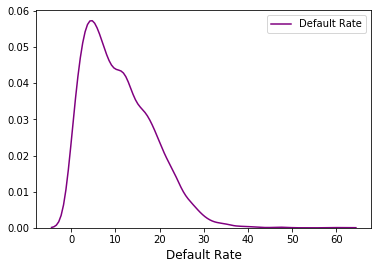

In [19]:
sns.distplot( df["target"],
             color="purple", label="Default Rate", hist = False)
plt.xlabel('Default Rate', fontsize = 12)

- On average, schools have a default rate of 9.6% in the academic year 2012-2013
- About three quarters of the schools has a default rate more than 15.9% in the academic year 2012-2013

Let's take a closer look at the institutes that have a lower or higher default rate than the median:

In [20]:
less_than_median = df.query('target < 9.6').groupby('control').size().reset_index(name = 'count: default rate less than median')
more_than_median = df.query('target > 9.6').groupby('control').size().reset_index(name = 'count: default rate more than median')

less_than_median.merge(more_than_median)

,control,count: default rate less than median,count: default rate more than median
0,private for-profit,546,930
1,private non-profit,1169,283
2,public,520,1031


* Most institutes (about 87%) with a default rate higher than the median (9.6%) are private for-profit and public entities.
 
Since the distribution is skewed to the right, let's take a look at the institutes with high default rates:

In [21]:
df.query('target > 35')[['name', 'state', 'control', 'target']].sort_values(by = 'target', ascending = False)

,name,state,control,target
4474,Ambiance Beauty & Barber Academy Inc,FL,private for-profit,60.0
4459,Larry's Barber College,IL,public,48.3
143,Shorter College,AR,private non-profit,47.0
3976,Jay's Technical Institute,TX,private for-profit,46.6
3548,CRU Institute of Cosmetology and Barbering,CA,private for-profit,42.4
3585,Capstone College,CA,private for-profit,41.4
2291,United Tribes Technical College,ND,private non-profit,40.8
1376,Rob Roy Academy-Fall River,MA,private for-profit,39.3
2800,Denmark Technical College,SC,public,39.3
4403,Nashville Barber and Style Academy,TN,private for-profit,39.2


* Most of these institutes are private. Further, these are predominantly for-profit.
* A large number are cosmetolegy and barber colleges.

#### Feature Selection (Bi and multivariate Explorations)

Next we will perform feature selection. This will reduce the number of dimensions in the feature space (dimensionality reduction), which also impacts the accuracy of prediction models. For this Analysis, we will start be selecting a subset of the input variables. You can go through the full documentation to figure out which variables strike as most interesting to you.  Since the dataset is huge and consists of a large number of features, I resort to picking up a small subset of useful-looking features from the dataset. It would be counterproductive to investigate each feature by itself. Through some exploratory analysis and good judgement, we can initially pick a few seemingly important features that influence the default rates.

- In college features remove : unitid, name, city, zip. 

It can also be interesting to see if states have an influence on the default rate later on. The states are encoded as objects, let's convert them to numerics.

In [22]:
us_state_abbrev_num = {'AL': 1,'AK': 2,'AZ': 3,'AR': 4,'CA': 5,'CO': 6,'CT': 7,'DE': 8,'FL': 9,'GA': 10,
                   'HI': 11,'ID': 12,'IL': 13,'IN': 14,'IA': 15,'KS': 16,'KY': 17,'LA': 18,'ME': 19,'MD': 20,
                   'MA': 21,'MI': 22,'MN': 23,'MS': 24,'MO': 25,'MT': 26,'NE': 27,'NV': 28,'NH': 29,'NJ': 30,
                   'NM': 31,'NY': 32,'NC': 33,'ND': 34,'OH': 35,'OK': 36,'OR': 37,'PA': 38,'RI': 39,'SC': 40,
                   'SD': 41,'TN': 42,'TX': 43,'UT': 44,'VT': 45,'VA': 46,'WA': 47,'WV': 48,'WI': 49,'WY': 50, 
                   'DC' :51, 'GU':52, 'PR':53, 'VI':54}

college_features_2012_2013['state'].replace(to_replace = us_state_abbrev_num, 
                                         inplace = True)
college_features_2013_2014['state'].replace(to_replace = us_state_abbrev_num, 
                                         inplace = True)

In [23]:
# Change back control from objects to numerics
college_features_2012_2013.control.replace(to_replace = {'public':1, 'private non-profit':2, 
                                                         'private for-profit':3}, inplace = True)

From the graphs below we can see that the features 'admission rate at institution' and 'admission rate for all campuses' have a high correlation and thus have almost the same effect on the dependent variable (target: default rate). The same conclusion applies to the 'sat score institution' and 'sat score for all campuses'. 
 
From the college features datasets for both academic years the following features are dropped: 
* admission_rate and sat_score_average

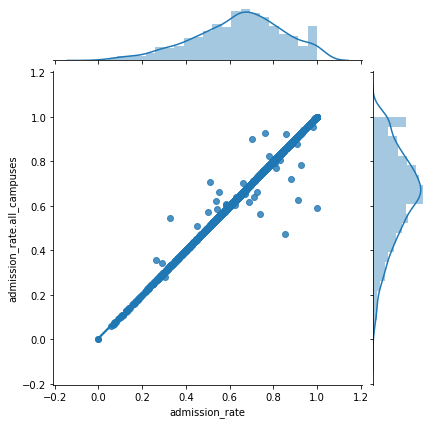

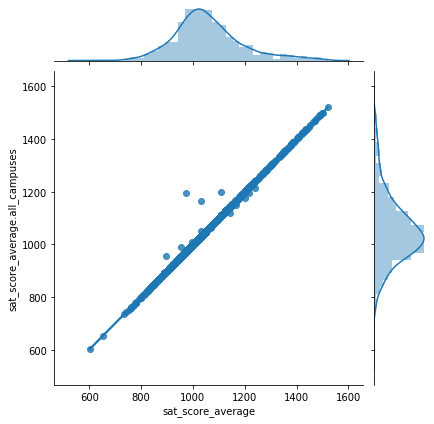

In [24]:
JG1 = sns.jointplot(x=df['admission_rate'], y=df['admission_rate.all_campuses'], data=df, kind="reg");
JG2 = sns.jointplot(x=df['sat_score_average'], y=df['sat_score_average.all_campuses'], data=df, kind="reg");

In [25]:
# Drop initial unnecessary features
college_features_2012_2013 = college_features_2012_2013.drop(columns=['unitid','name','city','zip','admission_rate', 'sat_score_average'])
college_features_2013_2014 = college_features_2013_2014.drop(columns=['unitid','name','city','zip','admission_rate', 'sat_score_average'])

#### Final Data Sets 

In this section we create three different datasets:
* Dataset 1 (manually remove features)
* Datasets 2, 3 (remove features using a model)

### Dataset 1

In [26]:
df = college_features_2012_2013
dfColumns = df.columns.values.tolist()

In [27]:
list = []
for column in df:
    collumn = df[column]
    df_y = df['target']
    correlation = collumn.corr(df_y, method='pearson')
    list.append(correlation)
dictionary = dict(zip(dfColumns, list))   

In [28]:
new_data = {k: v for k, v in dictionary.items()}

We are only interested in correlation values >0.5 or -0.5< 


In [29]:
new_data = {k: v for k, v in dictionary.items() if  (v > 0.5 or v < -0.5) }

In [30]:
new_data

{'sat_score_average.all_campuses': -0.6861314928971249,
 'completion_rate_4yr_studies_150%_of_expected_time': -0.6213371149853155,
 'completion_rate_4yr_studies_200%_of_expected_time': -0.5996333523672129,
 'default_rate': 0.8084960389247517,
 'target': 1.0}

We can see that the following four features are strongly correlated with the default rate (target/label):
    - sat_score_average
    - completion_rate_4yr_studies_150%_of_expected_time
    - completion_rate_4yr_studies_200%_of_expected_time
    - default_rate_previous_year
    
Reduce feature space for the datasets from both academic years by removing all other features:

In [31]:
df_zeros_2012_2013 = college_features_2012_2013.copy()
df_zeros_2013_2014 = college_features_2013_2014.copy() #create copies of dataframes

df_mean_2012_2013 = college_features_2012_2013.copy()
df_mean_2013_2014 = college_features_2013_2014.copy() #create copies of dataframes

college_features_2012_2013 = college_features_2012_2013[['opeid','sat_score_average.all_campuses', 'completion_rate_4yr_studies_150%_of_expected_time', 'completion_rate_4yr_studies_200%_of_expected_time','default_rate','target']]
college_features_2013_2014 = college_features_2013_2014[['opeid','sat_score_average.all_campuses', 'completion_rate_4yr_studies_150%_of_expected_time', 'completion_rate_4yr_studies_200%_of_expected_time','default_rate']]

Scatterplots and heatmap for better visualization of the correlation between each feature and the default rate (target/label). 

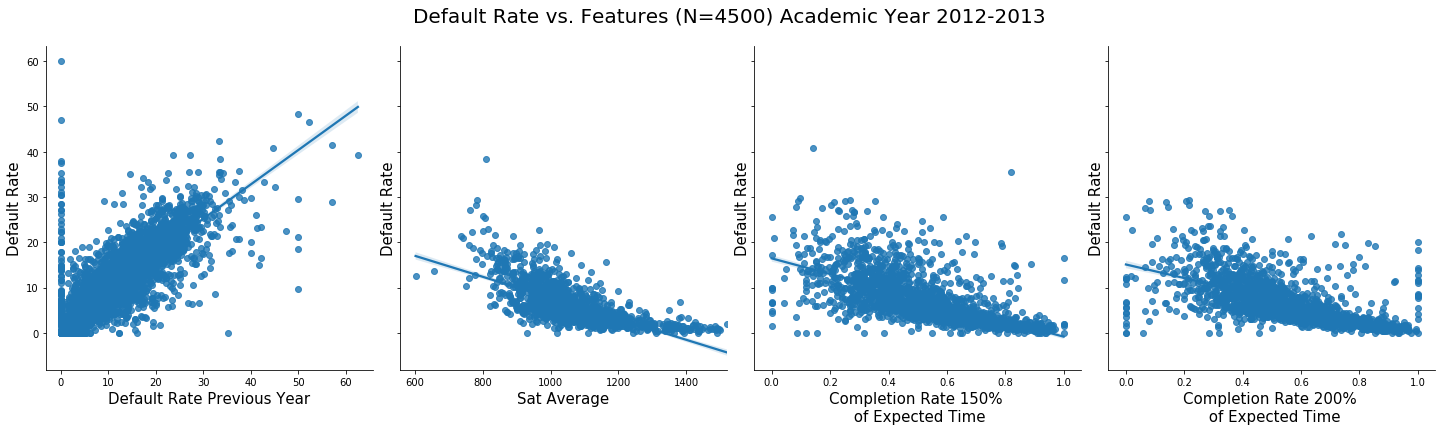

In [32]:
g = sns.pairplot(college_features_2012_2013, y_vars=['target'],
             x_vars=['default_rate', 'sat_score_average.all_campuses',
                     'completion_rate_4yr_studies_150%_of_expected_time',
                     'completion_rate_4yr_studies_200%_of_expected_time'] 
             ,height=5, kind='reg',markers=["o"])
g.fig.suptitle('Default Rate vs. Features (N=4500) Academic Year 2012-2013', y=1.1, fontsize=20)

xlabels,ylabels = ['Default Rate Previous Year','Sat Average',
                   'Completion Rate 150% \n of Expected Time', 'Completion Rate 200% \n of Expected Time'],['Default Rate']

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=15)
        g.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=15)

plt.show()

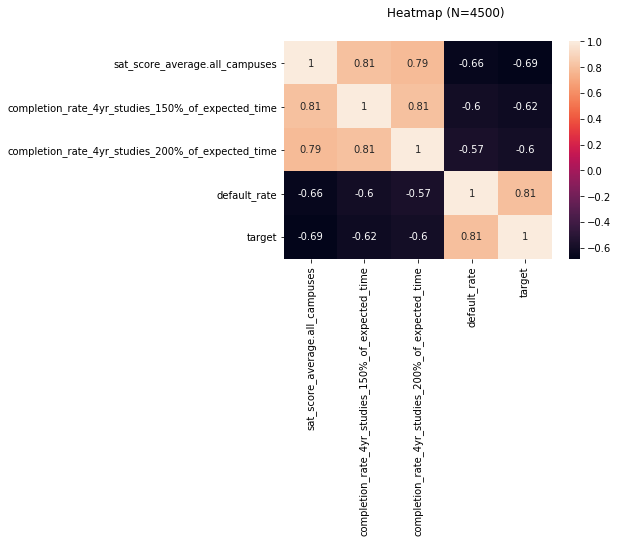

In [33]:
h = sns.heatmap(college_features_2012_2013[['sat_score_average.all_campuses',
                                       'completion_rate_4yr_studies_150%_of_expected_time',
                                        'completion_rate_4yr_studies_200%_of_expected_time',
                                        'default_rate',
                                        'target']].corr(), annot = True)
plt.suptitle('Heatmap (N=4500)', y=1, fontsize=12)
plt.show()

As already discussed, missing values in the dataset will be a potential caveat during the analysis. Each feature in our reduced feature space has an exessive number of NaN values that we have already displayed. We stated that the missing information may have been purposely not provided by the institutes to make the institutes more attractive to students. Let's assume this is the case.

Now we can either opt for removing the entire rows containing such data or imputing them using different methods. I try to go ahead with the latter. We shouldn’t try to impute non-random missing data using typical imputation methods. It’s better to either remove them or investigate the method through which the data was collected. I will remove them. Moreover, if certain rows contain far too many NaN values, I will remove them as well.

This means that more than 50 % of the data will be deleted. This is a lot. But with the remaining data, we can build a more accurate model. About 1800 institutes remain, which is more than enough to make predictions.

In [34]:
new_dat = college_features_2012_2013
collumn = college_features_2012_2013['sat_score_average.all_campuses']
new_dat = new_dat[~collumn.isnull().values]
collumn1 = new_dat['completion_rate_4yr_studies_150%_of_expected_time']
new_dat = new_dat[~collumn1.isnull().values]
collumn2 = new_dat['completion_rate_4yr_studies_200%_of_expected_time']
new_dat = new_dat[~collumn2.isnull().values]
collumn3 = new_dat['default_rate']
new_dat = new_dat[~collumn3.isnull().values]

In [35]:
new_dat1 = college_features_2013_2014
ccollumn = college_features_2013_2014['sat_score_average.all_campuses']
new_dat1 = new_dat1[~ccollumn.isnull().values]
ccollumn1 = new_dat1['completion_rate_4yr_studies_150%_of_expected_time']
new_dat1 = new_dat1[~ccollumn1.isnull().values]
ccollumn2 = new_dat1['completion_rate_4yr_studies_200%_of_expected_time']
new_dat1 = new_dat1[~ccollumn2.isnull().values]
ccollumn3 = new_dat1['default_rate']
new_dat1 = new_dat1[~ccollumn3.isnull().values]

### Datasets 2 and 3

In addition to dataset 1, we also create two additional datasets were we impute NaN values in each column as follows:

* Replace missing NaN values with zeros
* Replace missing NaN values with the mean of the column.

In these datasets we do not remove any features, but select features using a model.

In [36]:
df_zeros_2012_2013.fillna(0, inplace=True)
df_zeros_2013_2014.fillna(0, inplace=True)

df_mean_2012_2013.fillna(df.mean(), inplace=True)
df_mean_2013_2014.fillna(df.mean(), inplace=True)

#### Conclusions

Because many institutes lacked crucial information, three subsets of the data remain for both academic years 2012-2013 and 2013-2014. 

### Q4: If you had to set a fixed interest rate per school for the coming year (2013-2014), what would have to be the minimum for each school in order to break even? (hint: you will need to predict default rates, include these results in your answer)

For each school in order to break even the interest rates need to be set equal to the predicted default rates. To predict the default rates for the academic year 2013-2014, we use the 2012-2013 dataset and build a model using this dataset for training and testing purposes. Eventually the model will be used to make predictions for the 2013-2014 dataset.

We will compare two different machine learning regression models:

* Linear Regression
* Random Forests Regressor

To evaluate the models we use the following metrics:
* R-Squared ($R^2$). 
* Root Mean Squared Errors (RMSE)

This part consists of three parts:
* Part 1: Data with selected features and NaN values removed
* Part 2: Data were NaN values are replaced by zeros 
* Part 3: Data were NaN values are replaced by the mean 

In [37]:
# Import
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

### PART 1

In [58]:
X = new_dat.drop(['target'], axis = 1)
y = new_dat['target']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Find the best hyper-parameters for the regressors

In [ ]:
# Random Forests
# After Grid Search:
# The best hyper-parameters for Random Forests are:  {'max_depth': 5, 'n_estimators': 150}

tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred1 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

Build the models using the tuned hyper-parameters and fit

In [60]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=5, random_state=0,
                             n_estimators=150)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Predict price using the models above

In [61]:
y_lin_pred1 = regressor.predict(X_test)    # Linear regression
y_lin_pred2 = regr_rf.predict(X_test)      # Random Forests

In [62]:
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test,y_lin_pred1)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_lin_pred2)), 3))

The R^2 value for Linear Regression is        : 0.797
The R^2 value for Random Forests Regressor is : 0.795


In [63]:
MSE_lr  = mean_squared_error(y_test,y_lin_pred1)
MSE_rf  = mean_squared_error(y_test,y_lin_pred2)

In [64]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The RMSE value for Linear Regression is        : 2.0
The RMSE value for Random Forests Regressor is : 2.0


Text(0.5, 1.0, 'Linear Regression')

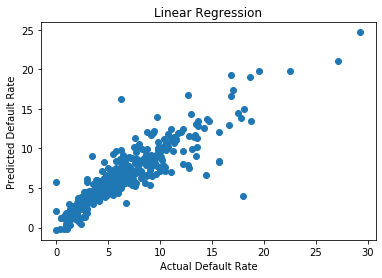

In [65]:
plt.scatter(y_test, y_lin_pred1)
plt.xlabel("Actual Default Rate")
plt.ylabel("Predicted Default Rate")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Random Forest')

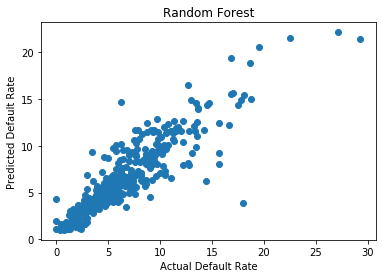

In [66]:
plt.scatter(y_test, y_lin_pred2)
plt.xlabel("Actual Default Rate")
plt.ylabel("Predicted Default Rate")
plt.title("Random Forest")

We can argue that the RMSE value in our case is quite low, as it means that our predictions are on average 2% off the real values. Note that lenders will always include on top of their predictions a margin of safety in the calculation of their interest rates.


* I would advice comparing the performance of more Machine Learning algorithms: SVM, KNN, etc. I would also advice to standardize the input feature values. This might further improve the accuracy of the predictions. 

* As we already discussed, the data might not be missing at random and therefore I would advice to only keep data of universities that are transparant about certain important features. This minimizes the risk for the lender and the predictions are more accurate. 
* For the predictions we will use the datasets from 2012-2013 and 2013-2014 where we kept certain features and removed NaN values without imputing.
* To break even set interest rates equal to predicted default rates + a margin of safety equal to the RMSE value.

The predicted default rates (for a subset of universities in 2013-2014) are:

In [67]:
# Predict default rates of 2013/2014
X_pred = new_dat1  # values converts it into a numpy array

predictions = regressor.predict(X_pred)

In [68]:
# Interest rates
new_dat1['predicted_default_rates'] = predictions

### PART 2

In [38]:
#X = new_dat.iloc[:, 1:5].values  # Feature Variables converted into a numpy array
#y = new_dat.iloc[:, -1].values.reshape(len(X),1)  # Target Variable converted into a numpy array
X = df_zeros_2012_2013.drop(['target'], axis = 1)
y = df_zeros_2012_2013['target']

In [39]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Select features and find the best hyper-parameters for the regressors

In [40]:
# Linear Regression
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

A=X.columns
selected_features = A.to_list()
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['control', 'region', 'admission_rate.all_campuses', 'program_percentage.communication', 'program_percentage.communications_technology', 'program_percentage.personal_culinary', 'program_percentage.biological', 'program_percentage.theology_religious_vocation', 'program_percentage.psychology', 'program_percentage.security_law_enforcement', 'program_percentage.mechanic_repair_technology', 'program_percentage.visual_performing', 'program_percentage.health', 'distance_only', 'demographics.race_ethnicity.white', 'demographics.race_ethnicity.black', 'demographics.race_ethnicity.hispanic', 'demographics.race_ethnicity.aian', 'demographics.race_ethnicity.nhpi', 'demographics.race_ethnicity.non_resident_alien', 'demographics.race_ethnicity.unknown', 'instructional_expenditure_per_fte', 'completion_rate_4yr_studies_150%_of_expected_time', 'completion_rate_less_than_4yr_studies_150%_of_expected_time', 'share_first_time_full_time_students', 'completion_rate_4yr_studies_2

In [ ]:
# Random Forests
# After Grid Search:
# The best hyper-parameters for Random Forests are:  {'max_depth': 20, 'n_estimators': 200}

tuned_parameters = [{'max_depth': [20], 'n_estimators': [200]}]
#tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred1 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

Build the models using the tuned hyper-parameters and fit

In [41]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=20, random_state=0,
                             n_estimators=200)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Predict price using the models above

In [42]:
y_pred1 = regressor.predict(X_test)    # Linear regression
y_pred2 = regr_rf.predict(X_test)      # Random Forests

In [43]:
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test,y_pred1)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred2)), 3))

The R^2 value for Linear Regression is        : 0.656
The R^2 value for Random Forests Regressor is : 0.709


In [44]:
MSE_lr  = mean_squared_error(y_test,y_pred1)
MSE_rf  = mean_squared_error(y_test,y_pred2)

In [45]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The RMSE value for Linear Regression is        : 5.0
The RMSE value for Random Forests Regressor is : 4.0


Text(0.5, 1.0, 'Linear Regression')

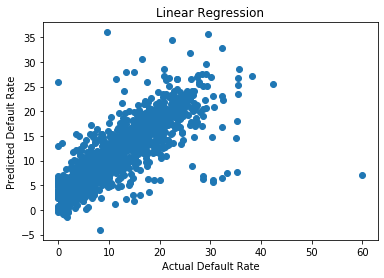

In [46]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Default Rate")
plt.ylabel("Predicted Default Rate")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Random Forest')

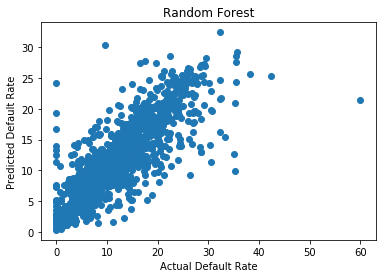

In [47]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Default Rate")
plt.ylabel("Predicted Default Rate")
plt.title("Random Forest")

### PART 3

In [48]:
X = df_mean_2012_2013.drop(['target'], axis = 1)
y = df_mean_2012_2013['target']

In [49]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Select features and find the best hyper-parameters for the regressors

In [50]:
# Linear Regression
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

A=X.columns
selected_features = A.to_list()
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['control', 'program_percentage.architecture', 'program_percentage.communication', 'program_percentage.communications_technology', 'program_percentage.education', 'program_percentage.engineering', 'program_percentage.english', 'program_percentage.biological', 'program_percentage.philosophy_religious', 'program_percentage.theology_religious_vocation', 'program_percentage.physical_science', 'program_percentage.psychology', 'program_percentage.mechanic_repair_technology', 'program_percentage.visual_performing', 'program_percentage.health', 'undergrad_enrollment_size', 'demographics.race_ethnicity.white', 'demographics.race_ethnicity.black', 'net_tuition_revenue_per_full_time_equivalent_student', 'instructional_expenditure_per_fte', 'average_faculty_salary', 'completion_rate_less_than_4yr_studies_150%_of_expected_time', 'completion_rate_less_than_4yr_studies_200%_of_expected_time', 'number_of_defaults', 'number_of_loans', 'default_rate']


In [ ]:
# Random Forests
# After Grid Search:
# The best hyper-parameters for Random Forests are:  {'max_depth': 15, 'n_estimators': 200}

tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred1 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

Build the models using the tuned hyper-parameters and fit

In [51]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=15, random_state=0,
                             n_estimators=200)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
y_pred1 = regressor.predict(X_test)           # Linear regression
y_pred2 = regr_rf.predict(X_test)             # Random Forests

In [53]:
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test,y_pred1)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred2)), 3))

The R^2 value for Linear Regression is        : 0.642
The R^2 value for Random Forests Regressor is : 0.704


In [54]:
MSE_lr  = mean_squared_error(y_test,y_pred1)
MSE_rf  = mean_squared_error(y_test,y_pred2)

In [55]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The RMSE value for Linear Regression is        : 5.0
The RMSE value for Random Forests Regressor is : 4.0


Text(0.5, 1.0, 'Linear Regression')

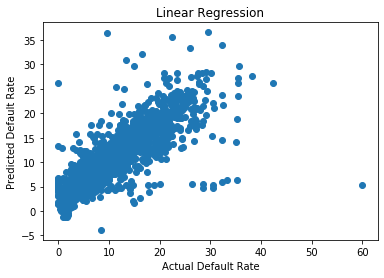

In [56]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Default Rate")
plt.ylabel("Predicted Default Rate")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Random Forest')

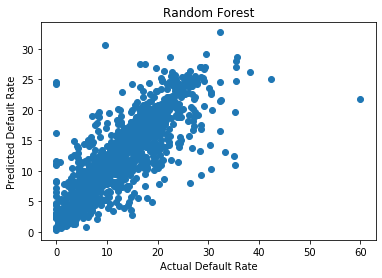

In [57]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Default Rate")
plt.ylabel("Predicted Default Rate")
plt.title("Random Forest")

### CONCLUSIONS Q4

* Removing the missing data resulted in quite accurate predictions. I would advise researching how the data is collected to extend the dataset if possible.
* Imputing the missing data resulted in a higher RMSE value. I would advice to further look into other imputing methods. 

### Q5: Assuming you could have a monopoly on loans for students enrolled at one of five universities next year (2013-2014), what universities would you pick and why? (assuming all loans get charged the same rate of 7%)?

I would choose the institutes where I could make significant profits

* Choose institutes with default rates lower than 7%. I also added a 2% margin on top of the predicted default rates based on the RMSE value. 
* By using a fixed interest rate along with the predicted default rate, we can estimate a predicted profit percentage. Then, using the total amount of unsubsidized undergraduate loans in usd of the previous academic year 2012-2013, we can calculate the predicted profit in USD, the main parameter for selecting institutes.

Note: 
* We assumed that the total amount of loaned money will be roughly the same this year. 
* We assumed that the client is only interested in unsubsidized undergraduate loans. Therefore, we only keep unsubsidized undergraduate loan types. Unsubsidized undergrauate loans are not based on financial need and the interest starts to accrue when the student is studying. It is clear that our client wants to provide loans for students that are not in need of financial aid.

In [69]:
#new_dat1['profit'] = 7 - new_dat1['predicted_default_rates'] 
loans_2012_2013   = pd.read_csv("/Users/dilan/task/Datasets/Historical Data/loans_2012_2013.csv")
loans_2012_2013 = loans_2012_2013.drop(columns=['name', 'state'])
loans_2012_2013 = loans_2012_2013.drop(loans_2012_2013.filter(regex='plus|nb|_recipients|subsidized_r|subsidized_l|subsidized_d|_graduate').columns, axis=1)
loans_2012_2013['unsubsidized_undergraduate_loans_originated_usd'] = loans_2012_2013['unsubsidized_undergraduate_loans_originated_usd']

In [70]:
new_dat1['predicted_default_rates'] = new_dat1['predicted_default_rates'] + 2
new_dat1 = new_dat1.merge(loans_2012_2013, on=['opeid']) 

In [71]:
new_dat2= new_dat1.copy()
new_dat2['unsubsidized_undergraduate_loans_originated_usd'] = new_dat2['unsubsidized_undergraduate_loans_originated_usd'].apply(lambda x: str(x)[2:].replace(',', ''))


In [72]:
#new_dat2['unsubsidized_undergraduate_loans_originated_usd'].apply(lambda x: x) == '- '
new_dat2['unsubsidized_undergraduate_loans_originated_usd'][new_dat2['unsubsidized_undergraduate_loans_originated_usd'].values == '- '] = 0
new_dat2['unsubsidized_undergraduate_loans_originated_usd'] = new_dat2['unsubsidized_undergraduate_loans_originated_usd'].apply(lambda x: float(x))


/Users/dilan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
new_dat2['profit'] = 7 - new_dat2['predicted_default_rates'] 
new_dat2['profit_usd'] = new_dat2['unsubsidized_undergraduate_loans_originated_usd']*new_dat2['profit']/float(100)


Below is a list of universities which I would choose from top to bottom.

In [74]:
new_dat2.query('profit_usd > 0')[['opeid','predicted_default_rates','profit','profit_usd', 'unsubsidized_undergraduate_loans_originated_usd']].sort_values(by = 'profit_usd', ascending = False)





,opeid,predicted_default_rates,profit,profit_usd,unsubsidized_undergraduate_loans_originated_usd
552,3969,4.018763,2.981237,1.644217e+06,55152165.0
1258,3895,3.084172,3.915828,1.362811e+06,34802619.0
254,1775,3.306897,3.693103,1.346612e+06,36462894.0
525,2325,2.634509,4.365491,1.273433e+06,29170454.0
210,1598,3.848956,3.151044,1.213861e+06,38522507.0
1191,3754,3.524470,3.475530,1.194628e+06,34372533.0
1128,3658,4.698516,2.301484,1.182797e+06,51392803.0
438,2103,3.497738,3.502262,1.176930e+06,33604850.0
668,2629,5.581628,1.418372,1.159220e+06,81728951.0
485,2199,3.224125,3.775875,1.147172e+06,30381611.0


### Q6: Assuming every school gets assigned to a category that determines the interest rate charged on its students' loans, how would you define those categories and how many would there be? Rank these categories by assigned interest rate and display your reasoning graphically.

We assumed that only the default rate determines the interest rate. That's why we create categories based on default rates. I chose to use categories for every 2% of default rates. I  chose these quite narrow because otherwise the spread of default rates in a category with set interest rates is too large. As a result, the financial institution will have losses and colleges/universities with good default rates are paying too much interest. The width of 2% is chosen because that is the uncertainty of the prediction, so it is unlikely that the interest rate will be set too low. 

See the distribution of colleges in the histogram below.


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

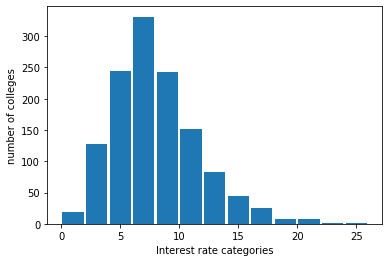

In [75]:
bins = np.linspace(0,26,14)

fig1 =plt.figure()
ax = fig1.add_subplot(111)
ax.hist(new_dat2['predicted_default_rates'], bins=bins, rwidth= 0.9)
ax.set_xlabel('Interest rate categories')
ax.set_ylabel('number of colleges')
fig1.show



### References
The datasets that are included in this challenge are publicly available under the following licenses:
* college_features_2012_2013/2013_2014: This work is licensed by the US Department of Education under a <a href="https://creativecommons.org/publicdomain/zero/1.0/legalcode">Creative Commons CCZero 1.0 License/Waiver</a>.
* loans_2012_2013: This work is licensed by the Office of Federal Student Aid of the US Department of Education under a <a href="https://creativecommons.org/publicdomain/zero/1.0/legalcode">Creative Commons CCZero 1.0 License/Waiver</a>.
* default_rates_2012_2013/2011_2012: This work is licensed by the Office of Federal Student Aid of the US Department of Education under a <a href="https://creativecommons.org/publicdomain/zero/1.0/legalcode">Creative Commons CCZero 1.0 License/Waiver</a>.

The datasets included are adaptations of the original work, as published on following addresses:
* college_features_2012_2013/2013_2014: https://catalog.data.gov/dataset/college-scorecard
* loans_2012_2013: https://catalog.data.gov/dataset/federal-student-loan-program-data
* default_rates_2012_2013/2011_2012: https://catalog.data.gov/dataset/federal-family-education-loan-direct-loan-cohort-default-rates-2011/resource/6b240462-997d-44d3-8799-3325e0419643?inner_span=True